In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

In [2]:
import kid_readout.analysis.archive

In [3]:
import glob

In [5]:
hpd = pd.concat([kid_readout.analysis.archive.load_archive(x) for x in glob.glob('/data/detectors/archive/2014-12*.npy')]
               ,ignore_index=True)

In [5]:
hpd = kid_readout.analysis.archive.add_noise_summary(hpd)

In [ ]:
hpd = kid_readout.analysis.archive.add_noise_fits(hpd)

In [6]:
hpd.shape

(6304, 91)

In [7]:
hpddark = hpd[hpd.optical_state=='dark']
hpdled = hpd[hpd.optical_state=='light']

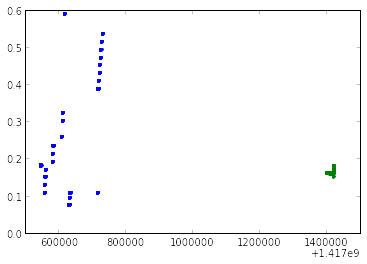

In [10]:
plot(hpddark.sweep_epoch,hpddark.sweep_primary_package_temperature,'.')
plot(hpdled.sweep_epoch,hpdled.sweep_primary_package_temperature,'.')


In [11]:
sc1 = kid_readout.analysis.archive.load_archive('/data/readout/archive/STAR_Cryo_4x5_0813f12_Al_horn_package_AR_chip_fully_taped.npy')

In [12]:
sc1 = sc1[sc1.sweep_primary_load_temperature<15]

In [11]:
sc1 = kid_readout.analysis.archive.add_noise_summary(sc1)

In [12]:
sc1 = kid_readout.analysis.archive.add_noise_fits(sc1)

In [13]:
sc1.optical_load.value_counts()

light    8520
dark     1900
dtype: int64

In [13]:
sc1load = sc1[sc1.optical_load=='light']

In [14]:
sc1dark = sc1[(sc1.optical_load=='dark') & (sc1.sweep_primary_load_temperature<4.01)]
sc1darkload = sc1[(sc1.optical_load=='dark') & (sc1.sweep_primary_load_temperature>4.01)]

(3.9, 4.2)

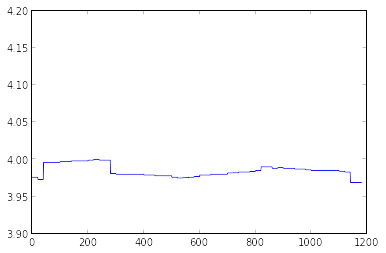

In [15]:
plot(sc1dark.sweep_primary_load_temperature)
ylim(3.9,4.2)

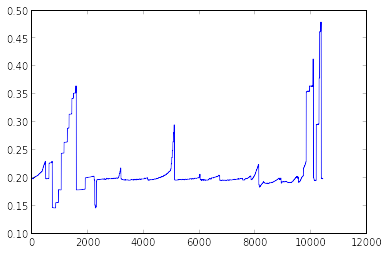

In [16]:
plot(sc1.sweep_primary_package_temperature)

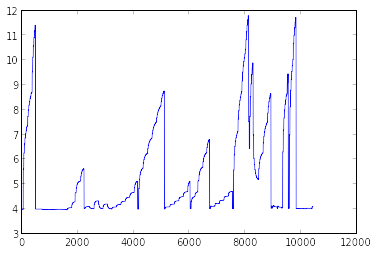

In [17]:
plot(sc1.sweep_primary_load_temperature)

In [19]:
sc2nps = ['/home/data/archive/mmw_noise_steps_2014-10-14_111614_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-15_114055_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-01_104437_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-17_114422_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-09-30_113742_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-18_124317_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-29_120929_mmwcwstep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-28_110145_mmwcwstep.npy',
'/home/data/archive/mmw_noise_steps_2014-09-24_112644_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-11-04_143712_mmwcwstep.npy',
'/home/data/archive/mmw_noise_steps_2014-11-03_165108_mmwcwstep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-30_121023_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-22_124915_mmwnoisestep.npy',
'/home/data/archive/mmw_noise_steps_2014-10-24_123812_mmwcwstep.npy',
'/home/data/archive/mmw_noise_steps_2014-09-29_163530_mmwnoisestep.npy']

In [20]:
sc2nps = [x.replace('/home/data','/data/readout') for x in sc2nps]

In [21]:
sc2 = pd.concat([kid_readout.analysis.archive.load_archive(x) for x in sc2nps],ignore_index=True)

In [21]:
sc2 = kid_readout.analysis.archive.add_noise_summary(sc2)

In [22]:
sc2 = kid_readout.analysis.archive.add_noise_fits(sc2)

In [22]:
sc2.shape

(9744, 95)

(-1, 9)

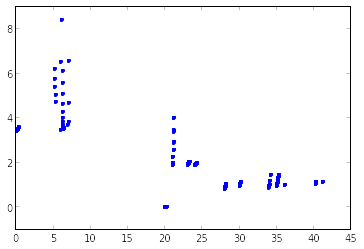

In [23]:
plot((sc2.sweep_epoch-sc2.sweep_epoch.min())/86400,sc2.sweep_primary_load_temperature,'.')
ylim(-1,9)

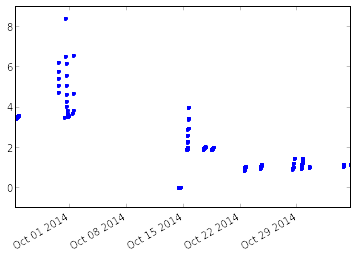

In [24]:
plot([datetime.datetime.fromtimestamp(x) for x in sc2.sweep_epoch],sc2.sweep_primary_load_temperature,'.')
ylim(-1,9)
f = gcf()
f.autofmt_xdate()

In [25]:
import time

In [26]:
sc2a = sc2[sc2.sweep_epoch < time.mktime(time.strptime('2014-10-08','%Y-%m-%d'))]

In [27]:
sc2b = sc2[(sc2.sweep_epoch > time.mktime(time.strptime('2014-10-08','%Y-%m-%d')))
        &(sc2.sweep_epoch < time.mktime(time.strptime('2014-10-22','%Y-%m-%d')))]

In [28]:
sc2c = sc2[sc2.sweep_epoch > time.mktime(time.strptime('2014-10-22','%Y-%m-%d'))]

In [29]:
sc2a.shape

(1856, 95)

In [30]:
len(np.unique(sc2a.columns))

95

In [31]:
#del sc2a['index']
del sc2b['index']
del sc2c['index']

In [80]:
kid_readout.analysis.archive.save_archive(sc2a,'/home/gjones/2015-01-21-sc2a-temporary-storage.npy')
kid_readout.analysis.archive.save_archive(sc2b,'/home/gjones/2015-01-21-sc2b-temporary-storage.npy')
kid_readout.analysis.archive.save_archive(sc2c,'/home/gjones/2015-01-21-sc2c-temporary-storage.npy')

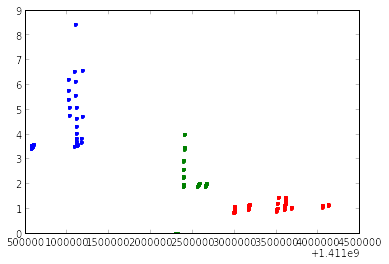

In [32]:
plot(sc2a.sweep_epoch,sc2a.sweep_primary_load_temperature,'.')
plot(sc2b.sweep_epoch,sc2b.sweep_primary_load_temperature,'.')
plot(sc2c.sweep_epoch,sc2c.sweep_primary_load_temperature,'.')


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


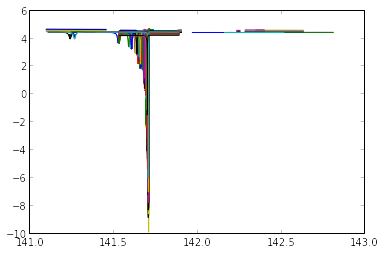

In [34]:
r0 = sc2[sc2.resonator_id==12]
for k,row in r0.iterrows():
    plot(row.sweep_freqs_MHz,20*np.log10(row.sweep_s21)+row.atten)
#ylim(6,8)

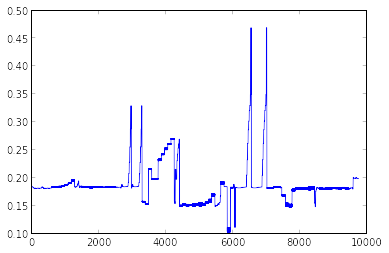

In [35]:
plot(sc2.sweep_primary_package_temperature)

In [36]:
ctemp = kid_readout.analysis.archive.get_constant_package_temperature_data(sc2)

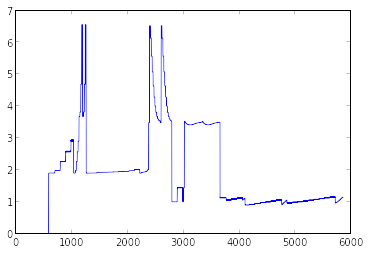

In [37]:
plot(ctemp.sweep_primary_load_temperature)

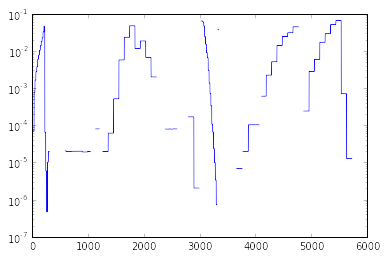

In [38]:
semilogy(ctemp.zbd_voltage)

In [39]:
dsets = [hpddark,hpdled,sc1dark,sc1load,sc2a,sc2b,sc2c]

(86.27, 86.32)

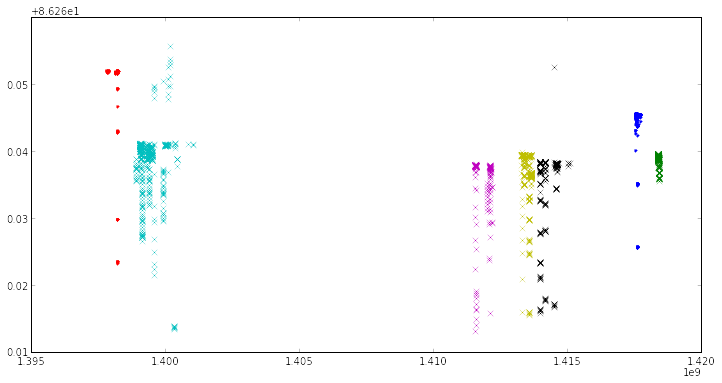

In [41]:
figure(figsize=(12,6))
for dset in dsets:
    r0 = dset[dset.resonator_id==2]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_epoch,r0.f_0,sym)
#ylim(77.48,77.53)
ylim(86.27,86.32)

(10, 10000.0)

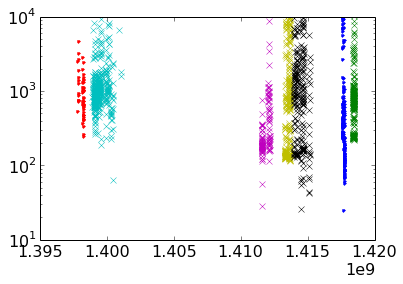

In [49]:
for dset in dsets:
    r0 = dset[dset.resonator_id==2]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.sweep_epoch,r0.Q_err,sym)
ylim(10,1e4)

In [49]:
rcParams['font.size']=20

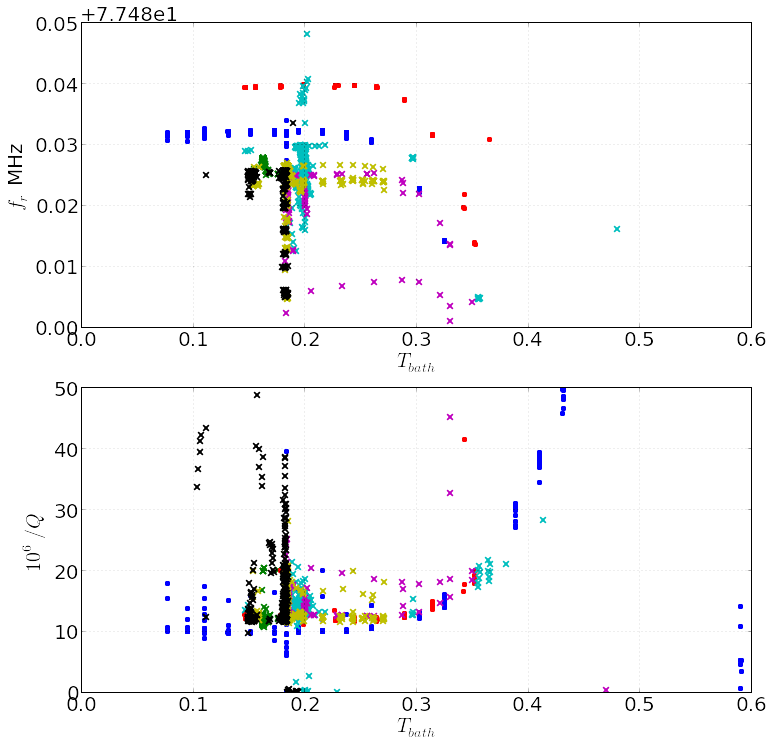

In [63]:
figure(figsize=(12,12))
subplot(211)
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_primary_package_temperature,r0.f_0,sym,mew=2)
ylim(77.48,77.53)
xlabel('$T_{bath}$')
ylabel('$f_r$ MHz')
grid()
subplot(212)
#figure(figsize=(12,6))
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_primary_package_temperature,1e6/r0.Q,sym,mew=2)
#ylim(77.48,77.53)
xlabel('$T_{bath}$')
ylabel('$10^6/Q$')
ylim(0,50)
grid()

(0, 50)

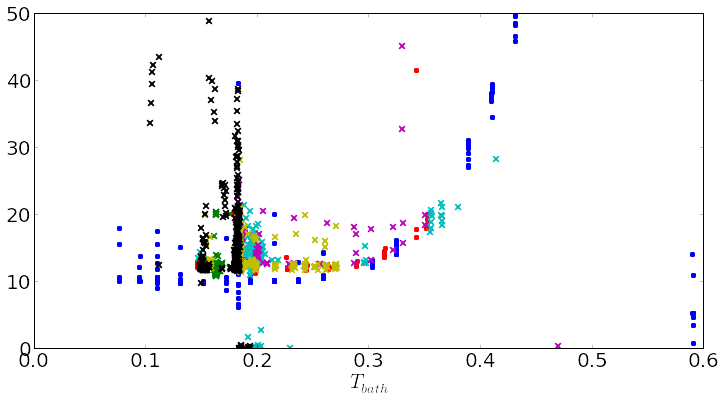

In [57]:
figure(figsize=(12,6))
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_primary_package_temperature,1e6/r0.Q,sym,mew=2)
#ylim(77.48,77.53)
xlabel('$T_{bath}$')
ylim(0,50)

(-1, 12)

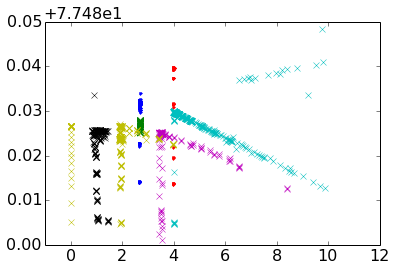

In [38]:
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_primary_load_temperature,r0.f_0,sym)
ylim(77.48,77.53)
xlim(-1,12)

(-1, 12)

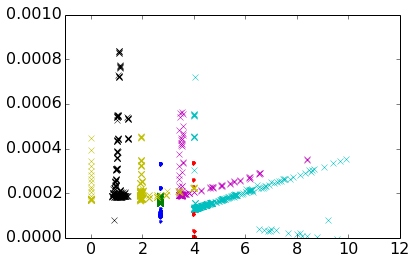

In [39]:
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_primary_load_temperature,1-r0.f_0/ sc1dark[sc1dark.resonator_id==0].f_0.max(),sym)
ylim(0,1e-3)
xlim(-1,12)

In [40]:
r0 = sc1load[sc1load.resonator_id==0]

(77.4, 77.7)

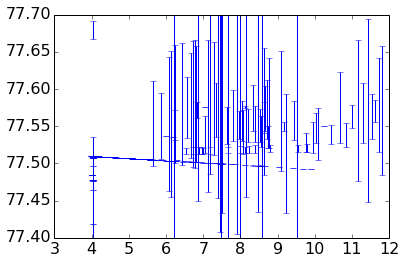

In [41]:
errorbar(r0.sweep_primary_load_temperature,r0.f_0,yerr=r0.f_0_err,linestyle='')
ylim(77.4,77.7)

In [42]:
good = r0[(r0.f_0_err/r0.f_0<1e-5) & (r0.f_0_err>0)]

<Container object of 3 artists>

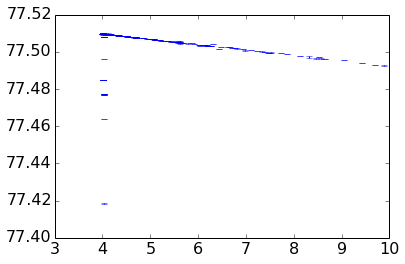

In [43]:
errorbar(good.sweep_primary_load_temperature,good.f_0,yerr=good.f_0_err,linestyle='')
#ylim(77.4,77.7)

In [ ]:
sc1dark.atten.value_counts()

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_epoch,r0.Q_e_imag,sym)
ylim(20000,60000)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==0]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_epoch,r0.Q,sym)
ylim(20000,100000)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.sweep_primary_package_temperature,r0.Q,sym)
ylim(5e3,500000)
T=np.linspace(0.05,0.5,100)
km = kid_readout.analysis.kid_eqns.DarkKIDModelFractional()
km.params['nqp0'].value = 80
km.Qc=1.5e5
km.params['Tc'].value=1.6
semilogy(T,km.Qr(T))

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.sweep_primary_package_temperature,r0.Q_i,sym)
ylim(5e3,2000000)
T=np.linspace(0.05,0.5,100)
km = kid_readout.analysis.kid_eqns.DarkKIDModelFractional()
for nqp in [50,100,500,1000,2000]:
    km.params['nqp0'].value = nqp
    km.Qc=1.5e5
    km.params['Tc'].value=1.6
    semilogy(T,km.Qi(T))

In [ ]:
np.median(r0.Q_e_real)

In [ ]:
np.median(r0.Q_e_imag)

In [ ]:
semilogy(T,km.tau_qp(T))

In [ ]:
km.Qi??

In [ ]:
s1,s2 = kid_readout.analysis.kid_eqns.s1s2(T,1.6,100e6)

In [ ]:
semilogy(T,s1)

In [ ]:
1.76*1.6/1.46

In [ ]:
km.params

In [ ]:
import kid_readout.analysis.kid_eqns

In [ ]:
class qpmodel(kid_readout.analysis.kid_eqns.DarkKIDModelFractional):
    

In [ ]:
km = kid_readout.analysis.kid_eqns.DarkKIDModelFractional()

In [ ]:
km.params['nqp0'].value=50

In [ ]:
T=np.linspace(0.05,0.5,100)
semilogy(T,km.Qi(T))

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==12]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.sweep_primary_package_temperature,r0.Q_i,sym)
ylim(1e3,1e7)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.sweep_primary_load_temperature,r0.Q_i,sym)
ylim(1e3,1e7)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    if 'zbd_voltage' in r0.columns:
        if np.any(np.isfinite(r0.zbd_voltage)):
            
            loglog(r0.zbd_voltage,r0.Q_i,sym)
ylim(1e3,1e7)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.f_0,1/r0.Q_i,sym)
ylim(1e-7,1e-4)
xlim(92.0,92.3)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==2]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.f_0,1/r0.Q_i,sym)
ylim(1e-7,1e-5)
xlim(86.28,86.32)

In [ ]:
for dset in dsets:
    r0 = dset[dset.resonator_id==3]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(dset.f_0_err/dset.f_0,sym,alpha=0.1)

In [ ]:
for k,dset in enumerate(dsets):
    r0 = dset[dset.resonator_id==1]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.power_dbm,1/r0.Q_i,sym)
ylim(1e-7,3e-6)

In [ ]:
for k,dset in enumerate(dsets):
    r0 = dset[dset.resonator_id==1]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    semilogy(r0.power_dbm,r0.A_mag,sym)
ylim(1e-2,1)

In [ ]:
for k,dset in enumerate(dsets):
    r0 = dset[dset.resonator_id==1]
    r0 = dset
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    if k < 2:
        sym = 'x'
    else:
        sym = '.'
    semilogy(r0.f_0,10**(r0.power_dbm/10)/(r0.A_mag**2*r0.nfft/16384.),sym)

ylim(1e-8,1e-7)

In [ ]:
for dset in dsets:
    h,b = np.histogram(dset.delay*16384/dset.nfft,bins=np.linspace(-65.32,-55.298,1000))
    semilogy(b[:-1],h)
#ylim(-70,-50)

In [ ]:
for k,dset in enumerate(dsets):
    r0 = dset[dset.resonator_id==1]
    if 'optical_state' in r0.columns:
        if r0.optical_state.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    else:
        if r0.optical_load.iloc[0] =='light':
            sym = 'x'
        else:
            sym = '.'
    plot(r0.sweep_epoch,10**(r0.power_dbm/10)/r0.A_mag**2,sym)
ylim(0,5e-8)

In [ ]:
1.72e10*1.76*1.46*1.38e-23/1.6e-19

In [ ]:
.65*.1/(2*_)

In [ ]:
1/_

In [ ]:
1e-6/_161

In [ ]:
_*1870

In [ ]:
_*300e-6

In [ ]:
1/(117*300e-6)

In [ ]:
r0 = sc1[sc1.resonator_id==0]

In [ ]:
semilogy(r0.Q_i,'.')
ylim(1,1e7)
xlim(200,250)

In [ ]:
semilogy(r0.f_0_err/r0.f_0,'.')

In [ ]:
idx = 200
plot(r0.sweep_freqs_MHz.iloc[idx],20*np.log10(abs(r0.sweep_s21.iloc[idx])))

In [ ]:
a = hpddark[(hpddark.resonator_id==2) & (hpddark.atten==37)].sort(['sweep_primary_package_temperature'])
b = sc1dark[(sc1dark.resonator_id==2) & (sc1dark.atten==36)].sort(['sweep_primary_package_temperature'])

In [ ]:
a[a.atten==37].power_dbm.iloc[0]

In [ ]:
b[b.atten==36].power_dbm.iloc[0]

In [ ]:
plot(a.f_0,1/a.Q_i,'.-')
plot(b.f_0,1/b.Q_i,'.-')
ylim(1e-7,1e-5)
xlim(77.4,77.6)

In [ ]:
plot(a.sweep_primary_package_temperature,a.f_0,'.-')
plot(b.sweep_primary_package_temperature,b.f_0,'.-')
ylim(77.45,77.55)

In [ ]:
plot(a.sweep_primary_package_temperature,1/a.Q_i,'.-')
plot(b.sweep_primary_package_temperature,1/b.Q_i,'.-')
#ylim(77.45,77.55)
ylim(1e-7,1e-5)

In [ ]:
def delta(nqp,N0=1.72e10/1.6e-19,delta0=1.76*1.46*1.38e-23):
    return (delta0*N0+np.sqrt(delta0**2 * N0**2 - 2*nqp*delta0*N0))/(2*N0)

In [ ]:
nqp = np.linspace(1,1e8,1000)
plot(nqp,delta(nqp)/(1.76*1.46*1.38e-23))

In [ ]:
N0=1.72e10/1.6e-19
delta0=1.76*1.46*1.38e-23
print N0*delta0

In [ ]:
import scipy.special

In [ ]:
def s1(T,f0=150e6,Tc=1.46):
    delta0 = 1.76*Tc*1.38e-23
    xi = 6.626e-34*f0/(2*1.38e-23*T)
    return ((delta0/(1.38e-23*T)-xi*np.cosh(xi)/np.sinh(xi)
            +xi*scipy.special.k1(xi)/scipy.special.k0(xi)) / 
            (delta0/(1.38e-23*T)+0.5))

In [ ]:
def s2(T,f0=150e6,Tc=1.46):
    delta0 = 1.76*Tc*1.38e-23
    xi = 6.626e-34*f0/(2*1.38e-23*T)
    return ((delta0/(1.38e-23*T)+xi
            -xi*scipy.special.i1(xi)/scipy.special.i0(xi)) / 
            (delta0/(1.38e-23*T)+0.5))

In [ ]:
T = np.linspace(0.05,1)

In [ ]:
xi0 = 6.626e-34*100e6/(2*1.38e-23*0.1)

In [ ]:
xi0

In [ ]:
print 6.626e-34*6e9/(2*1.38e-23*0.1)

In [ ]:
plot(T,s1(T,f0=100e6))
plot(T,s1(T,f0=6e9))
plot(T,s2(T,f0=100e6))
plot(T,s2(T,f0=6e9))


In [ ]:
import kid_readout.analysis.khalil

In [ ]:
loglog(sc1.Q_i,
         kid_readout.analysis.khalil.qi_error(sc1.Q, sc1.Q_err, sc1.Q_e_real, sc1.Q_e_real_err, sc1.Q_e_imag,sc1.Q_e_imag_err)/sc1.Q_i,
         '.',alpha=0.1)
xlim(1e4,1e7)

In [ ]:
r0 = hpdled[(hpdled.resonator_id==0) & (np.abs(hpdled.sweep_primary_package_temperature-.162) < 0.003)&(hpdled.atten==45)
            &(hpdled.Q_i>0)]

In [ ]:
plot(r0.f_0,r0.zbd_voltage,'.')

In [ ]:
plot(r0.timestream_modulation_duty_cycle)

In [ ]:
plot(r0.sweep_primary_package_temperature)

In [ ]:
r0a = hpddark[(hpddark.resonator_id==0) & (hpddark.atten==37)]
r0b = sc1dark[(sc1dark.resonator_id==0) & (sc1dark.atten==36)]

In [ ]:
plot(r0a.sweep_primary_package_temperature,r0a.f_0,'.')
plot(r0b.sweep_primary_package_temperature,r0b.f_0,'.')
#ylim(103.4,103.55)

In [ ]:
r0a['segment']=1
r0b['segment']=2
testset = pd.concat((r0a,r0b),ignore_index=True)
testset['Q_i_err'] = kid_readout.analysis.khalil.qi_error(testset.Q, testset.Q_err,
                                                          testset.Q_e_real, testset.Q_e_real_err,
                                                          testset.Q_e_imag, testset.Q_e_imag_err
                                                          )
testset = testset[(testset.f_0_err>0) & (testset.Q_i_err>0) & (testset.sweep_primary_package_temperature < 0.45)
                  &(testset.sweep_primary_package_temperature>0.1)
                  &(testset.Q_i < 2e6)
                  &(testset.Q_i>0)]

In [ ]:
testset.Q_i_err.min()

In [ ]:
testset.atten.value_counts()

In [ ]:
testset.f_0_err.min()

In [ ]:
import kid_readout.analysis.global_kid_model
reload(kid_readout.analysis.global_kid_model)

In [ ]:
km = kid_readout.analysis.global_kid_model.DarkMultisegment(testset,Cg=1.12*2.7e-11,qi_err_scale=1e-4, sigma_n=1.25e7)
km.params['Cg'].vary = True
km.params['Cg'].min=2.6e-11
km.params['Cg'].max = 4e-11

In [ ]:
import lmfit

In [ ]:
km.params

In [ ]:
km.f0_qi(np.array([0.1]),np.array([1]))

In [ ]:
res = lmfit.minimize(km.f0_qi_resid,km.params,method='lbfsgb')

In [ ]:
lmfit.report_fit(km.params)

In [ ]:
res.message

In [ ]:
res.nfev

In [ ]:
res.success

In [ ]:
res.values

In [ ]:
(res.params['delta_meV'].value*1.6e-19/1e3)/(1.76*1.38e-23)

In [ ]:
1/(1.25e7*2e-8)

In [ ]:
res.params['delta_meV']

In [ ]:
#km.params['chi_L_1'].value=1e-2
f0,qi  = km.f0_qi(testset.sweep_primary_package_temperature,testset.segment.values)

In [ ]:
plot(f0,1/qi,'.')
plot(testset.f_0*1e6,1/testset.Q_i,'x')
yscale('log')

In [ ]:
semilogy(testset.sweep_primary_package_temperature,qi,'.')
semilogy(testset.sweep_primary_package_temperature,testset.Q_i,'x')

In [ ]:
loglog(testset.Q_i,testset.Q_e_real/testset.Q_e_real_err,'.')

In [ ]:
semilogy(testset.Q_i_err)

In [ ]:
semilogy(testset.sweep_primary_package_temperature,qi,'.')
errorbar(testset.sweep_primary_package_temperature,testset.Q_i,yerr=testset.Q_i_err,linestyle='')

In [ ]:
plot(testset.sweep_primary_package_temperature,f0/1e6,'.')
errorbar(testset.sweep_primary_package_temperature,testset.f_0,yerr=testset.f_0_err*1e2,linestyle='')
ylim(77.3,77.55)

In [ ]:
resid = (km.f0_qi_resid(km.params))
f0resid = resid[:len(resid)/2]
qiresid = resid[len(resid)/2:]
semilogy(testset.sweep_primary_package_temperature,abs(f0resid/(testset.f_0_err*1e6)),'.')
semilogy(testset.sweep_primary_package_temperature,abs(qiresid/(testset.Q_i_err*km.qi_err_scale)),'.')


In [ ]:
semilogy(testset.sweep_primary_package_temperature,km.qi_err_scale*testset.Q_i_err/testset.Q_i,'.')
semilogy(testset.sweep_primary_package_temperature,testset.f_0_err/testset.f_0,'.')

In [ ]:
plot(testset.sweep_primary_package_temperature)

In [ ]:
testset[18:22].atten

In [ ]:
testset.power_dbm.value_counts()

In [ ]:
testset.atten.value_counts()

In [ ]:
plot(testset.atten,testset.power_dbm,'.')

In [ ]:
testset[testset.atten==36].segment

In [ ]:
r0 = hpddark[(hpddark.resonator_id>0) & (np.abs(hpddark.sweep_primary_package_temperature-0.162) < 0.02)]

In [ ]:
semilogy(r0.power_dbm, r0.noise_fit_device_noise,'.')
#semilogy(r0.power_dbm, r0.noise_fit_amplifier_noise,'.')
a = np.linspace(-118,-100,1000)
semilogy(a,1e-23/np.sqrt(10**(a/10)))
ylim(5e-19,1e-17)

In [ ]:
r0a = hpddark[(hpddark.resonator_id==0) & (hpddark.atten==37)]
r0b = sc1dark[(sc1dark.resonator_id==0) & (sc1dark.atten==36)]
r0c = sc2a[(sc2a.resonator_id==0) & (sc2a.sweep_primary_package_temperature>0.2) & (sc2a.sweep_primary_load_temperature<5.0)
           &(sc2a.timestream_modulation_duty_cycle==1) &(sc2a.f_0<77.6)
           &(sc2a.sweep_epoch < time.mktime(time.strptime('2014-09-28','%Y-%m-%d')))]
r0a['segment']=1
r0b['segment']=2
r0c['segment']=3
testset = pd.concat((r0a,r0b,r0c),ignore_index=True)
testset['Q_i_err'] = kid_readout.analysis.khalil.qi_error(testset.Q, testset.Q_err,
                                                          testset.Q_e_real, testset.Q_e_real_err,
                                                          testset.Q_e_imag, testset.Q_e_imag_err
                                                          )
testset = testset[(testset.f_0_err>0) & (testset.Q_i_err>0) & (testset.sweep_primary_package_temperature < 0.45)
                  &(testset.sweep_primary_package_temperature>0.1)
                  &(testset.Q_i < 2e6)
                  &(testset.Q_i>0)]

In [ ]:
plot(testset.sweep_primary_package_temperature,testset.Q_i,'.')
plot(r0c.sweep_primary_package_temperature,r0c.Q_i,'.')
#xlim(0.16,0.165)

In [ ]:
plot(testset.sweep_primary_package_temperature,testset.f_0,'.')

In [ ]:
km = kid_readout.analysis.global_kid_model.DarkMultisegment(testset,Cg=1.12*2.7e-11,qi_err_scale=1e-2, sigma_n=1.25e7)
km.params['Cg'].vary = True
km.params['Cg'].min=2.6e-11
km.params['Cg'].max = 4e-11

In [ ]:
res = lmfit.minimize(km.f0_qi_resid,km.params,method='anneal')

In [ ]:
lmfit.report_fit(res)

In [ ]:
f0,qi  = km.f0_qi(testset.sweep_primary_package_temperature,testset.segment.values)

In [ ]:
semilogy(testset.sweep_primary_package_temperature,qi,'.')
errorbar(testset.sweep_primary_package_temperature,testset.Q_i,yerr=testset.Q_i_err,linestyle='',marker='x')

In [ ]:
plot(f0,1/qi,'.')
plot(r0a.f_0*1e6,1/r0a.Q_i,'x')
plot(r0b.f_0*1e6,1/r0b.Q_i,'x')
#plot(r0c.f_0*1e6,1/r0c.Q_i,'x')
plot(testset.f_0*1e6,1/testset.Q_i,'v')
xlim(77.35e6,77.55e6)
ylim(0,4e-5)

In [ ]:
plot(testset.Q_err,'.')


In [ ]:
plot(r0c.sweep_epoch,'.')

In [ ]:
plot(sc2a.sweep_epoch,sc2a.sweep_primary_load_temperature,'.')
plot(sc2b.sweep_epoch,sc2b.sweep_primary_load_temperature,'.')
ax = gca()
ax.axvline(time.mktime(time.strptime('2014-09-28','%Y-%m-%d')))

In [ ]:
(~np.isfinite(sc2a.sweep_primary_load_temperature)).sum()

In [ ]:
for k,row in r0b.iterrows():
    plot(row.sweep_freqs_MHz,abs(row.sweep_s21),'.-')
xlim(77.45,77.6)